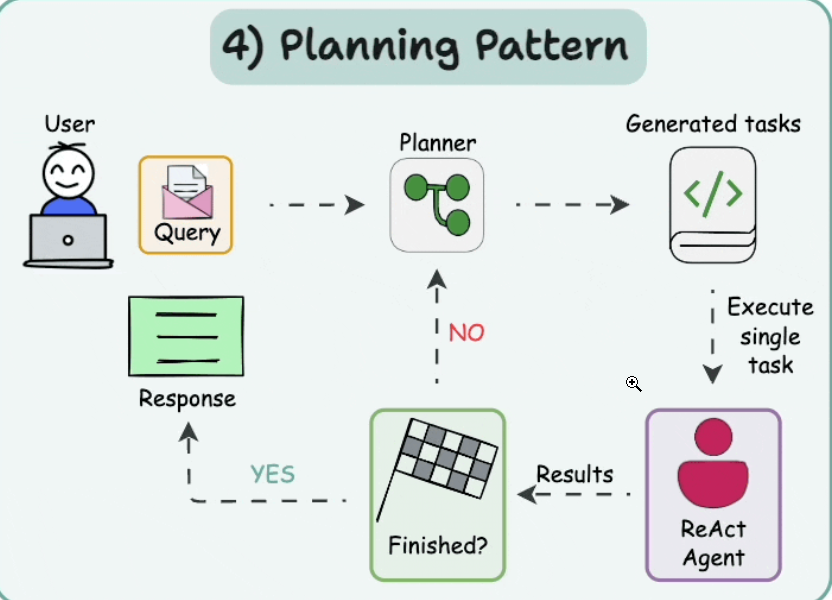

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai wikipedia

# Clean up the notebook
clean_notebook()


Notebook cleaned.


In [2]:
import os
from openai import OpenAI
import json
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

In [3]:
import os
from openai import OpenAI
import random
import wikipedia
import json
from io import StringIO
import sys

# Set up OpenAI client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
model_name = "gpt-4o"  # Using 'gpt-4o' as a stand-in; change if needed to 'gpt-4.1' or another model

# Multi-Agent Lab in Jupyter Notebook

This notebook demonstrates a simple multi-agent system using functions (no classes) for easy understanding. We have two agents:

1. **Research Agent**: Uses OpenAI to decide if it needs to search Wikipedia and then summarizes the information.
2. **Coding Agent**: Uses OpenAI to write and run Python code, then reflects on the output.


In [4]:
def search_wikipedia(term):
    try:
        result = wikipedia.summary(term, sentences=5)
        return result
    except Exception as e:
        return "Error: " + str(e)

def run_python_code(code):
    old_stdout = sys.stdout
    redirected_output = sys.stdout = StringIO()
    try:
        exec(code)
        sys.stdout = old_stdout
        return redirected_output.getvalue()
    except Exception as e:
        sys.stdout = old_stdout
        return str(e)

# Testing search_wikipedia

In [5]:
test_terms = [
    "Python (programming language)",
    "กรุงเทพมหานคร",
    "Mercury",
    "zxmomomnm"  # Likely an invalid term
]

separator = "-" * 50

for i, term in enumerate(test_terms, start=1):
    print(f"Test {i}: Searching for \"{term}\"")
    print("Result:")
    print(search_wikipedia(term))
    print(separator)


Test 1: Searching for "Python (programming language)"
Result:
Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.
Python is dynamically type-checked and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming.
Guido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language, and he first released it in 1991 as Python 0.9.0.
--------------------------------------------------
Test 2: Searching for "กรุงเทพมหานคร"
Result:
Bangkok, officially known in Thai as Krung Thep Maha Nakhon and colloquially as Krung Thep, is the capital and most populous city of Thailand. The city occupies 1,568.7 square kilometres (605.7 sq mi) in the Chao Phraya River delta in central Thailand and has an estimated population of 10 million people as of 2024, 13% of the country's

/usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Error: "Mercury" may refer to: 
Mercury (planet)
Mercury (element)
Mercury (mythology)
Mercury (toy manufacturer)
Mercury Communications
Mercury Corporation
Mercury Cyclecar Company
Mercury Drug
Mercury Energy
Mercury Filmworks
Mercury General
Mercury Interactive
Mercury Marine
Mercury Systems
Mercury Technologies
Mercury Truck & Tractor Company
TP-Link
Mercury (programming language)
Mercury (metadata search system)
Ferranti Mercury
Mercury Browser
Mercury Mail Transport System
Mercury (film)
Mercury (TV series)
Mercury Black
Sailor Mercury
Mercury (Marvel Comics)
Makkari (comics)
Metal Men
Cerebro's X-Men
Amalgam Comics character
Mercury (magazine)
The American Mercury
The Mercury (Hobart)
The Mercury (South Africa)
The Mercury (Pennsylvania)
Mercury (Newport)
Reading Mercury
The Mercury News
List of newspapers named Mercury
Mercury (Bova novel)
Mercury (Livesey novel)
Anna Kavan
Mercury Nashville
Mercury Records
Mercury Prize
Mercury, the Winged Messenger
Mercury (American Music Club

# Testing run_python_code

In [6]:
test_cases = [
    ("A simple print statement", "print('Hello, World!')"),
    ("Multiple print statements", "print('First line.')\nprint('Second line.')"),
    ("Code that performs a calculation", "x = 5\ny = 10\nprint(f'The sum is: {x + y}')"),
    ("Code with an intentional NameError", "print(non_existent_variable)"),
    ("A SyntaxError", "print('This is missing a closing quote'))"),
    ("A TypeError with an invalid operation", "print('Hello' + 5)"),
    ("A loop that prints", "for i in range(3):\n    print(i)"),
    ("Defining and calling a function", "def greet(name):\n    print(f'Hello, {name}!')\ngreet('Alice')"),
    ("A list comprehension", "squares = [x**2 for x in range(4)]\nprint(squares)"),
    ("A ZeroDivisionError", "print(10 / 0)")
]

separator = "-" * 50

for i, (description, code) in enumerate(test_cases, start=1):
    print(f"Test {i}: {description}")
    print(f"Input:\n{code}")
    print("Output:")
    print(run_python_code(code))
    print(separator)


Test 1: A simple print statement
Input:
print('Hello, World!')
Output:
Hello, World!

--------------------------------------------------
Test 2: Multiple print statements
Input:
print('First line.')
print('Second line.')
Output:
First line.
Second line.

--------------------------------------------------
Test 3: Code that performs a calculation
Input:
x = 5
y = 10
print(f'The sum is: {x + y}')
Output:
The sum is: 15

--------------------------------------------------
Test 4: Code with an intentional NameError
Input:
print(non_existent_variable)
Output:
name 'non_existent_variable' is not defined
--------------------------------------------------
Test 5: A SyntaxError
Input:
print('This is missing a closing quote'))
Output:
unmatched ')' (<string>, line 1)
--------------------------------------------------
Test 6: A TypeError with an invalid operation
Input:
print('Hello' + 5)
Output:
can only concatenate str (not "int") to str
--------------------------------------------------
Test 7: 

## Research Agent Function

This function acts as the research agent. It uses OpenAI tool calling to search Wikipedia if needed.

In [7]:
def research_agent(query):
    messages = [
        {"role": "system", "content": "You are a research agent. Use the search_wikipedia tool to find information from Wikipedia if needed. Summarize the key points."},
        {"role": "user", "content": query}
    ]
    
    tools = [
        {
            "type": "function",
            "function": {
                "name": "search_wikipedia",
                "description": "Search Wikipedia for information on a given term.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "term": {
                            "type": "string",
                            "description": "The search term for Wikipedia."
                        }
                    },
                    "required": ["term"]
                }
            }
        }
    ]
    
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=messages,
        tools=tools,
        tool_choice="auto"
    )
    
    choice = response.choices[0]
    if choice.message.tool_calls:
        tool_call = choice.message.tool_calls[0]
        if tool_call.function.name == "search_wikipedia":
            args = json.loads(tool_call.function.arguments)
            term = args["term"]
            wiki_result = search_wikipedia(term)
            
            messages.append(choice.message)
            messages.append({
                "role": "tool",
                "tool_call_id": tool_call.id,
                "name": tool_call.function.name,
                "content": wiki_result
            })
            
            # Second call for summarization/reflection
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=messages
            )
            return response.choices[0].message.content
    else:
        return choice.message.content

## Coding Agent Function

This function acts as the coding agent. It uses OpenAI tool calling to run Python code and reflects on the output.

In [8]:
def coding_agent(task):
    messages = [
        {"role": "system", "content": "You are a coding agent. Write Python code to solve the task, run it using the tool, and reflect on the output to provide a final answer."},
        {"role": "user", "content": task}
    ]
    
    tools = [
        {
            "type": "function",
            "function": {
                "name": "run_python_code",
                "description": "Execute Python code and return the output.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "code": {
                            "type": "string",
                            "description": "The Python code to execute."
                        }
                    },
                    "required": ["code"]
                }
            }
        }
    ]
    
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=messages,
        tools=tools,
        tool_choice="auto"
    )
    
    choice = response.choices[0]
    if choice.message.tool_calls:
        tool_call = choice.message.tool_calls[0]
        if tool_call.function.name == "run_python_code":
            args = json.loads(tool_call.function.arguments)
            code = args["code"]
            code_output = run_python_code(code)
            
            messages.append(choice.message)
            messages.append({
                "role": "tool",
                "tool_call_id": tool_call.id,
                "name": tool_call.function.name,
                "content": code_output
            })
            
            # Second call for reflection
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=messages
            )
            return response.choices[0].message.content
    else:
        return choice.message.content

## Multi-Agent System Function

This simple multi-agent system first calls the research agent, then passes the result to the coding agent.

In [9]:
def multi_agent_system(question):
    print("Research Agent working...")
    research_result = research_agent(question)
    print("Research Result:", research_result)
    
    print("\nCoding Agent working...")
    coding_task = f"Based on this research: {research_result}\nSolve or analyze the question with Python code if applicable: {question}"
    coding_result = coding_agent(coding_task)
    print("Coding Result:", coding_result)
    
    return coding_result

In [10]:
questions = [
    "จะแสดงกราฟเส้นของอุณหภูมิรายวันในหนึ่งสัปดาห์ได้อย่างไร?",
    "จะสร้างกราฟแท่งแสดงยอดขายของสินค้าแต่ละประเภทได้อย่างไร?",
    "จะวาดกราฟวงกลมแสดงสัดส่วนของนักเรียนแต่ละแผนการเรียนได้อย่างไร?",
    "ใช้ seaborn วาด histogram ของอายุผู้เข้าร่วมกิจกรรมต้องทำอย่างไร?",
    "จะพล็อตกราฟเส้นแสดงแนวโน้มของคะแนนสอบในแต่ละเทอมได้อย่างไร?",
    "จะใช้ pandas และ matplotlib สร้างกราฟเปรียบเทียบยอดขายรายเดือนอย่างไร?",
    "แสดง scatter plot ของความสูงกับน้ำหนักจาก DataFrame ทำอย่างไร?",
    "ใช้ seaborn วาด boxplot ของคะแนนสอบในแต่ละวิชาได้อย่างไร?",
    "จะพล็อต heatmap แสดงความสัมพันธ์ระหว่างคอลัมน์ตัวเลขได้อย่างไร?",
    "ต้องการวาดกราฟเส้นหลายเส้นเพื่อเปรียบเทียบข้อมูล 3 กลุ่มควรใช้โค้ดอะไร?"
]

print("List of 10 questions to test the multi-agent system:")
for i, q in enumerate(questions, 1):
    print(f"{i}. {q}")

List of 10 questions to test the multi-agent system:
1. จะแสดงกราฟเส้นของอุณหภูมิรายวันในหนึ่งสัปดาห์ได้อย่างไร?
2. จะสร้างกราฟแท่งแสดงยอดขายของสินค้าแต่ละประเภทได้อย่างไร?
3. จะวาดกราฟวงกลมแสดงสัดส่วนของนักเรียนแต่ละแผนการเรียนได้อย่างไร?
4. ใช้ seaborn วาด histogram ของอายุผู้เข้าร่วมกิจกรรมต้องทำอย่างไร?
5. จะพล็อตกราฟเส้นแสดงแนวโน้มของคะแนนสอบในแต่ละเทอมได้อย่างไร?
6. จะใช้ pandas และ matplotlib สร้างกราฟเปรียบเทียบยอดขายรายเดือนอย่างไร?
7. แสดง scatter plot ของความสูงกับน้ำหนักจาก DataFrame ทำอย่างไร?
8. ใช้ seaborn วาด boxplot ของคะแนนสอบในแต่ละวิชาได้อย่างไร?
9. จะพล็อต heatmap แสดงความสัมพันธ์ระหว่างคอลัมน์ตัวเลขได้อย่างไร?
10. ต้องการวาดกราฟเส้นหลายเส้นเพื่อเปรียบเทียบข้อมูล 3 กลุ่มควรใช้โค้ดอะไร?


--------------------------------------------------

Testing question: จะแสดงกราฟเส้นของอุณหภูมิรายวันในหนึ่งสัปดาห์ได้อย่างไร?
Research Agent working...
Research Result: การแสดงกราฟเส้นของอุณหภูมิรายวันในหนึ่งสัปดาห์สามารถทำได้โดยปฏิบัติตามขั้นตอนดังนี้:

1. **เก็บข้อมูล**: รวบรวมข้อมูลอุณหภูมิรายวันสำหรับทุกวันในสัปดาห์ที่คุณต้องการแสดงในกราฟ

2. **เลือกเครื่องมือสร้างกราฟ**: คุณสามารถใช้โปรแกรมหรือซอฟต์แวร์หลายประเภทในการสร้างกราฟ เช่น Microsoft Excel, Google Sheets, หรือไลบรารีอย่าง Matplotlib ใน Python

3. **ป้อนข้อมูล**: ใส่ข้อมูลอุณหภูมิที่คุณมีลงในเครื่องมือที่เลือก

4. **สร้างกราฟเส้น**:
    - ใน Excel หรือ Google Sheets: 
      - ใส่วันที่ในแกน X (Horizontal Axis) และอุณหภูมิในแกน Y (Vertical Axis)
      - เลือกประเภทกราฟเป็น "Line Chart"
    - ใน Python (ใช้ Matplotlib):
      - ติดตั้ง Matplotlib ถ้ายังไม่ได้ติดตั้งโดยใช้คำสั่ง `pip install matplotlib`
      - เขียนโค้ดเพื่อสร้างกราฟเส้น:

        ```python
        import matplotlib.pyplot as plt

        # ตัวอย่างข้อมูล
  

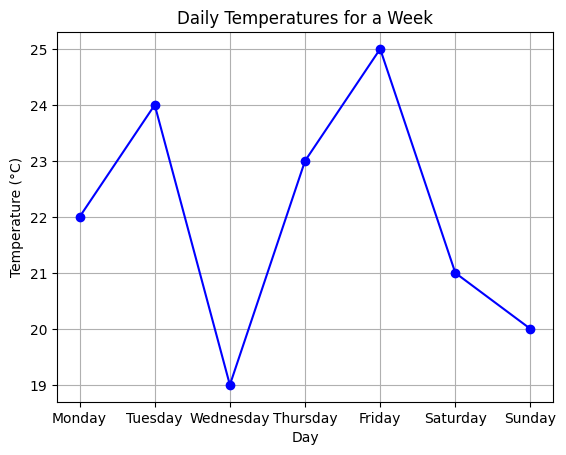

Coding Result: The Python code successfully generated a line graph displaying the daily temperatures of a week. This graph shows the variation in temperature throughout each day, with days on the X-axis and temperature in Celsius on the Y-axis. The graph includes markers on each point for better visibility of the data points, and it also has a grid to make the graph more readable. 

This approach provides a simple yet effective way to visualize temperature trends over a week. You can further customize the graph with different colors, line styles, or additional annotations as needed.
Final Result: The Python code successfully generated a line graph displaying the daily temperatures of a week. This graph shows the variation in temperature throughout each day, with days on the X-axis and temperature in Celsius on the Y-axis. The graph includes markers on each point for better visibility of the data points, and it also has a grid to make the graph more readable. 

This approach provides a 

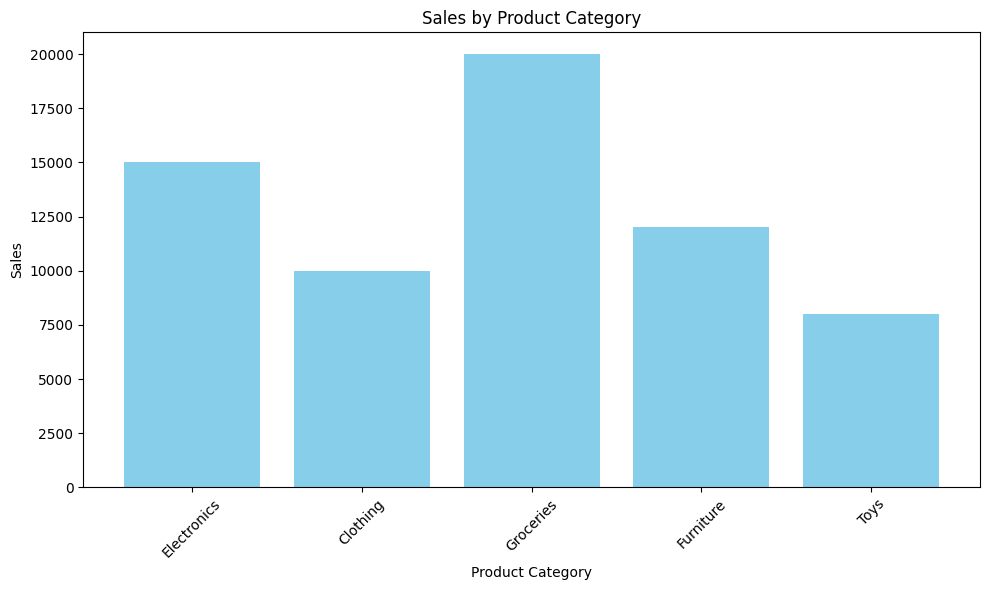

Coding Result: The Python code successfully generated a bar chart showing sales figures for each product category using Matplotlib. Here's a summary of the steps I used to create the chart:

1. **Data Preparation**: I created a sample dataset including product categories such as 'Electronics', 'Clothing', 'Groceries', 'Furniture', and 'Toys', with corresponding sales figures.

2. **Using Pandas and Matplotlib**: I employed the Pandas library to handle the data conveniently in a DataFrame, and Matplotlib to create visualizations.

3. **Bar Chart Creation**: Using `plt.bar()`, I plotted the sales data with product categories on the x-axis and sales numbers on the y-axis.

4. **Customization**: The chart includes a title and axis labels for clarity. I also adjusted the x-axis labels orientation and ensured the layout is tight to fit everything well.

5. **Final Display**: The chart was displayed with the specified configurations.

Here is how you'd typically approach creating similar bar 

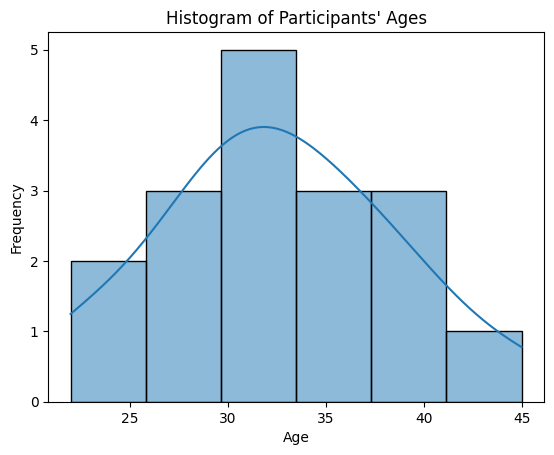

Coding Result: The histogram has been successfully generated using the Seaborn library in Python. It visualizes the distribution of participants' ages, with an added Kernel Density Estimate (KDE) line for better understanding of the continuous distribution. The plot includes labeled axes and a title for clarity. 

If you wish to create a similar plot, ensure to use the provided code steps, which include importing essential libraries, defining the data, and finally plotting and annotating the histogram.
Final Result: The histogram has been successfully generated using the Seaborn library in Python. It visualizes the distribution of participants' ages, with an added Kernel Density Estimate (KDE) line for better understanding of the continuous distribution. The plot includes labeled axes and a title for clarity. 

If you wish to create a similar plot, ensure to use the provided code steps, which include importing essential libraries, defining the data, and finally plotting and annotating 

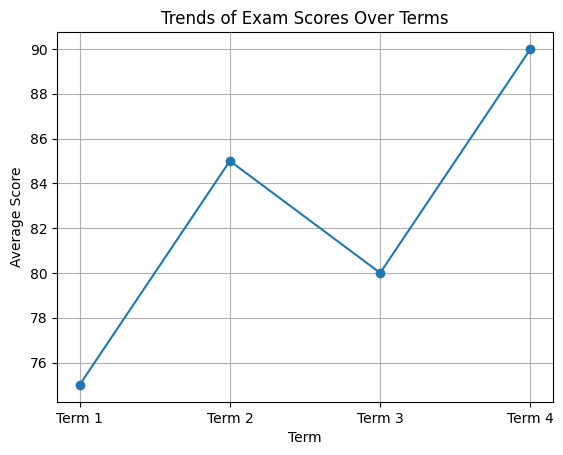

Coding Result: The code successfully executed and generated a line graph illustrating the trend of exam scores over different terms. The graph plotted the scores for terms 1 to 4, with markers indicating the average scores for each term. The x-axis labeled as "Term" corresponds to each academic term, and the y-axis labeled as "Average Score" shows the corresponding scores. The trend is clearly depicted through a line connecting the scores for each term, allowing for a straightforward visual analysis of how the scores evolved over time.
Final Result: The code successfully executed and generated a line graph illustrating the trend of exam scores over different terms. The graph plotted the scores for terms 1 to 4, with markers indicating the average scores for each term. The x-axis labeled as "Term" corresponds to each academic term, and the y-axis labeled as "Average Score" shows the corresponding scores. The trend is clearly depicted through a line connecting the scores for each term, a

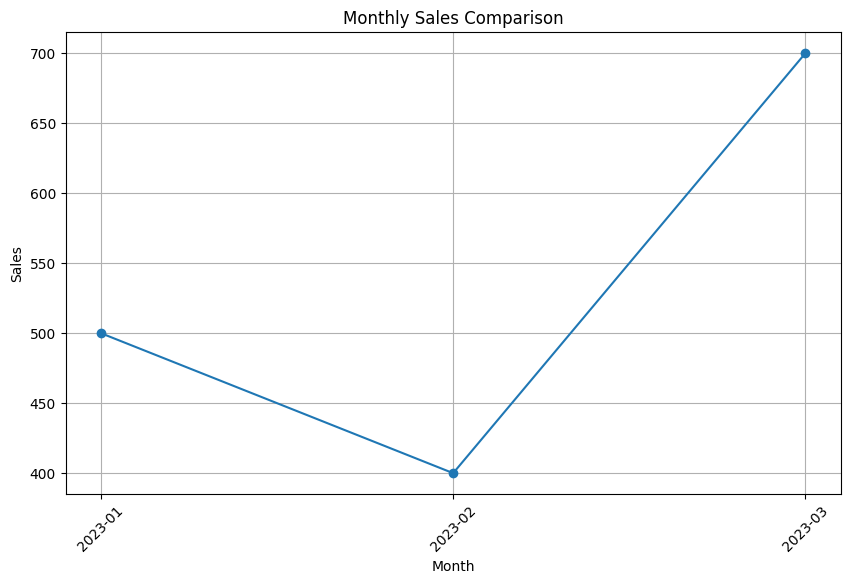

Coding Result: The code executed successfully and displayed a plot comparing monthly sales. This provides a visual representation of sales data aggregated by month using the Pandas and Matplotlib libraries. The steps followed were:

1. Data was prepared in a CSV string format, simulating a file read.
2. Data was read into a Pandas DataFrame.
3. The 'Date' column was converted to a Pandas datetime object.
4. A new 'Month' column was created from the 'Date' column, representing just the month.
5. Sales were summarized by month using the `groupby` and `sum` functions.
6. A line plot was created using Matplotlib, displaying the sales for each month.

This process effectively shows how to use Python libraries to handle data and visualize trends for better sales analysis.
Final Result: The code executed successfully and displayed a plot comparing monthly sales. This provides a visual representation of sales data aggregated by month using the Pandas and Matplotlib libraries. The steps followe

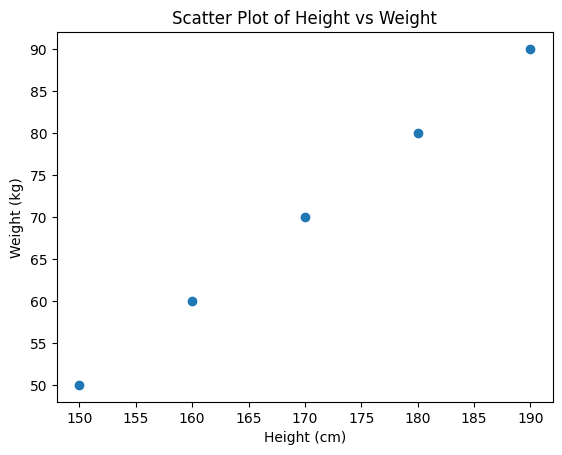

Coding Result: The Python code successfully generated a scatter plot using the given data about height and weight. In the plot, each point represents a person with their height on the x-axis and weight on the y-axis. The code utilizes the pandas library to handle data in a DataFrame and matplotlib for plotting. By following these steps, one can visualize the relationship between different variables such as height and weight easily. This method can be adapted to work with more complex datasets by modifying the DataFrame and scatter plot customizations as needed.
Final Result: The Python code successfully generated a scatter plot using the given data about height and weight. In the plot, each point represents a person with their height on the x-axis and weight on the y-axis. The code utilizes the pandas library to handle data in a DataFrame and matplotlib for plotting. By following these steps, one can visualize the relationship between different variables such as height and weight easil

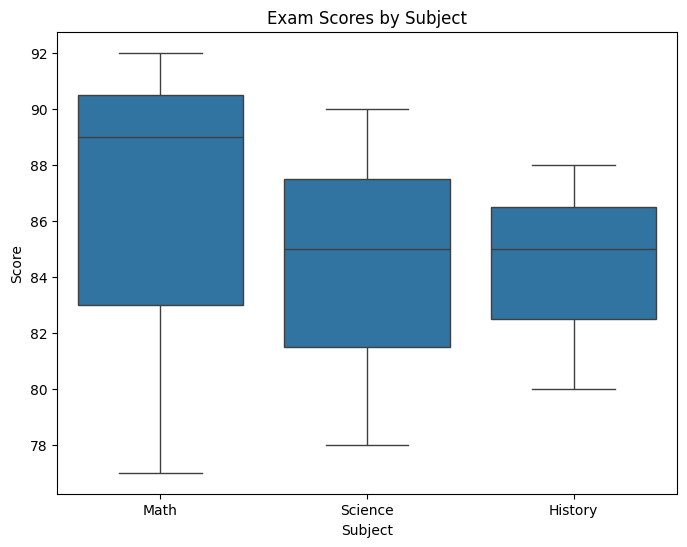

Coding Result: The code executed successfully and generated a boxplot using Seaborn to visualize exam scores across different subjects. Here’s a detailed explanation of the process involved in creating the boxplot:

- **Data Preparation**: A DataFrame is created with two columns: 'Subject' and 'Score'. It contains exam scores for three subjects: Math, Science, and History, with each subject having three different scores.

- **Library Importation**: The necessary libraries (Pandas for data manipulation, Seaborn for advanced plotting, and Matplotlib for additional plotting controls) are imported.

- **Boxplot Creation**: 
  - `sns.boxplot(x='Subject', y='Score', data=df)`: This line generates a boxplot. The x-axis represents different subjects, while the y-axis displays the scores.
  
- **Customization**:
  - `plt.figure(figsize=(8, 6))`: Sets the overall size of the figure for better visualization.
  - `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: These functions add a title and labels

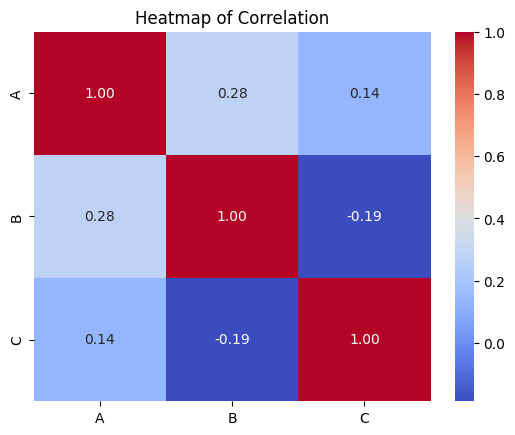

Coding Result: The code executed successfully, generating a heatmap that displays the correlation between the numerical columns ('A', 'B', 'C') of a randomly created pandas DataFrame. 

Here's how to plot a heatmap to show the correlation between numerical columns:

1. **Import necessary libraries**: Ensure you have `pandas`, `numpy`, `seaborn`, and `matplotlib` imported.
   
2. **Create or load your dataset**: I've created sample data using `numpy` to generate random numbers for demonstration purposes. In practice, you would replace this with loading your dataset using `pandas` (e.g., `pd.read_csv(filepath)`).

3. **Calculate the correlation matrix**: Use the `.corr()` method on your DataFrame to compute the pairwise correlation of columns.

4. **Plot the heatmap**: Use `seaborn`'s `heatmap` function to visualize the correlations. Set `annot=True` to display the correlation values on the heatmap, use `cmap='coolwarm'` to apply a color map, and `fmt=".2f"` to format the correlation val

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

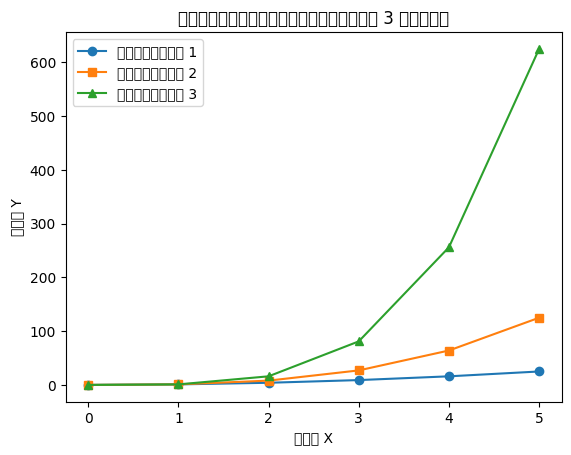

Coding Result: The code executed successfully and displayed a line graph comparing three groups of data, each represented by different line styles and markers. This confirms that the given sample code is functional and suitable for plotting multiple lines to compare datasets using Matplotlib in Python.

To use this code, simply replace the sample data (`x`, `y1`, `y2`, `y3`) with your actual datasets. Adjust the labels and titles as needed to fit the context of your data. The structure of the code allows for easy customization and flexibility to fit various data visualization needs.
Final Result: The code executed successfully and displayed a line graph comparing three groups of data, each represented by different line styles and markers. This confirms that the given sample code is functional and suitable for plotting multiple lines to compare datasets using Matplotlib in Python.

To use this code, simply replace the sample data (`x`, `y1`, `y2`, `y3`) with your actual datasets. Adjust

In [11]:
results = []
for question in questions:
    print("-" * 50)
    print(f"\nTesting question: {question}")
    result = multi_agent_system(question)
    results.append(result)
    print("Final Result:", result)


# Optionally, save or display all results
print("-" * 50)
print("\nAll Test Results:")

for i, res in enumerate(results, 1):
    print(f"{i}. {res}")

print("-" * 50)
